# Named graphs gallery
### in Raku

Anton Antonov  
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com)   
[RakuForPrediction-book at GitHub](https://github.com/antononcube/RakuForPrediction-book)      
June 2024  

-----

## Introduction

This notebook has a gallery of graphs that can be created with the Raku package ["Graph"](https://raku.land/zef:antononcube/Graph) and 
displayed with the Raku package ["JavaScript::D3"](https://raku.land/zef:antononcube/JavaScript:D3).

------

## Setup

Here are loaded the packages used in the rest of notebook:

In [51]:
use Graph;
use Graph::Circulant;
use Graph::Complete;
use Graph::CompleteKaryTree;
use Graph::Cycle;
use Graph::Grid;
use Graph::Indexed;
use Graph::HexagonalGrid;
use Graph::Hypercube;
use Graph::KnightTour;
use Graph::Path;
use Graph::Petersen;
use Graph::Star;
use Graph::TriangularGrid;
use Graph::Wheel;

use Graph::Distribution;
use Graph::Random;

use Data::Reshapers;
use Data::Summarizers;

use JavaScript::D3;
use WWW::MermaidInk;

### JavaScript

Here we prepare the notebook to visualize with JavaScript:

In [2]:
#% javascript
require.config({
     paths: {
     d3: 'https://d3js.org/d3.v7.min'
}});

require(['d3'], function(d3) {
     console.log(d3);
});

Verification:

In [3]:
#% js
js-d3-list-line-plot(10.rand xx 40, background => 'none', stroke-width => 2)

Here we set a collection of visualization variables:

In [4]:
my $title-color = 'Ivory';
my $stroke-color = 'SlateGray';
my $tooltip-color = 'LightBlue';
my $tooltip-background-color = 'none';
my $background = '#1F1F1F';
my $color-scheme = 'schemeTableau10';
my $edge-thickness = 3;
my $vertex-size = 6;
my $engine = 'neato';
my $mmd-theme = q:to/END/;
%%{
  init: {
    'theme': 'forest',
    'themeVariables': {
      'lineColor': 'Ivory'
    }
  }
}%%
END
my %force = collision => {iterations => 0, radius => 10},link => {distance => 180};
my %force2 = charge => {strength => -30, iterations => 4}, collision => {radius => 50, iterations => 4}, link => {distance => 30};

{charge => {iterations => 4, strength => -30}, collision => {iterations => 4, radius => 50}, link => {distance => 30}}

### Dot

In [5]:
sub dot(Graph:D $g, *%opts) { $g.dot(:svg, |%opts) }
sub fdp(Graph:D $g, *%opts) { $g.dot(engine => 'fdp', :svg, |%opts) }
sub sfdp(Graph:D $g, *%opts) { $g.dot(engine => 'sfdp', :svg, |%opts) }
sub neato(Graph:D $g, *%opts) { $g.dot(engine => 'neato', :svg, |%opts) }

&neato

### LLM graph assistant

In [6]:
#% chat ge prompt, model=gpt-3.5-turbo
You are very knowledgeable expert on Graph theory,
You know the Graph theory Wikipedia pages better than anyone.
Your answers to Graph theory related questions are concise and clear.
You provide clear examples if relevant to your answers.
If specifically requested you can provide code for making or displaying Graphs.
Unless specifically specified otherwise, you use Wolfram Language (aka Mathematica) for your code examples.
Unless specifically requested, you do not include code in your answers.

Chat object created with ID : ge.

------

## All graphs

In [7]:
my %namedGraphs = 
    Barabasi-Albert => Graph::Random.new(Graph::Distribution::BarabasiAlbert.new(20,2)),
    Circulant => Graph::Circulant.new(5,2),
    Complete => Graph::Complete.new(5),
    CompleteKaryTree => Graph::CompleteKaryTree.new(3,3),
    Cycle => Graph::Cycle.new(8),
    Grid => Graph::Grid.new(4,3),
    Hypercube => Graph::Hypercube.new(2),
    KnightTour => Graph::KnightTour.new(6,4),
    Path => Graph::Path.new('a'..'g', :directed),
    "Price's model" => Graph::Random.new(Graph::Distribution::Price.new(14, 2, 1)),
    Petersen => Graph::Petersen.new(),
    Random => Graph::Random.new(10,11),
    Star => Graph::Star.new(5),
    Spatial => Graph::Random.new(Graph::Distribution::Spatial.new(15, 0.5)),
    Watts-Strogatz => Graph::Random.new(Graph::Distribution::WattsStrogatz.new(20,0.07)),
    Wheel => Graph::Wheel.new(7, :directed);

.say for %namedGraphs

Hypercube => Graph(vertexes => 4, edges => 4, directed => False)
Watts-Strogatz => Graph(vertexes => 20, edges => 43, directed => False)
Random => Graph(vertexes => 10, edges => 11, directed => False)
Price's model => Graph(vertexes => 14, edges => 22, directed => True)
CompleteKaryTree => Graph(vertexes => 13, edges => 12, directed => False)
Wheel => Graph(vertexes => 8, edges => 14, directed => True)
Grid => Graph(vertexes => 12, edges => 17, directed => False)
Barabasi-Albert => Graph(vertexes => 20, edges => 34, directed => False)
Circulant => Graph(vertexes => 5, edges => 5, directed => False)
Spatial => Graph(vertexes => 15, edges => 56, directed => False)
Petersen => Graph(vertexes => 10, edges => 15, directed => False)
Star => Graph(vertexes => 6, edges => 5, directed => False)
KnightTour => Graph(vertexes => 24, edges => 44, directed => False)
Complete => Graph(vertexes => 5, edges => 10, directed => False)
Path => Graph(vertexes => 7, edges => 6, directed => True)
Cycle => Gr

In [8]:
#%js
%namedGraphs.pairs.sort(*.key).map({ 
    js-d3-graph-plot(
        $_.value.edges(:dataset),
        title => $_.key,
        :$background, 
        :$title-color, 
        width => 400, 
        edge-thickness => 2,
        vertex-size => 3,
        directed => $_.value.directed,
        force => {charge => {strength => -200}, link => {minDistance => 40}}
    )
 }).join("\n")

------

## Circulant graph

In [9]:
#%js
my $g = Graph::Circulant.new(5, 2);

#%js
$g.edges(:dataset) 
==> js-d3-graph-plot(
        :$background, 
        :$title-color, 
        width => 400, 
        :$edge-thickness,
        :$vertex-size,
        :%force
    )

In [10]:
#% html
$g.dot(:$background, engine => 'sfdp'):svg

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- 0 -->
 
 0 
 
 0 
 
<!-- 2 -->
 
 2 
 
 2 
 
<!-- 0--2 -->
 
 0--2 
 
 
<!-- 3 -->
 
 3 
 
 3 
 
<!-- 0--3 -->
 
 0--3 
 
 
<!-- 1 -->
 
 1 
 
 1 
 
<!-- 1--3 -->
 
 1--3 
 
 
<!-- 4 -->
 
 4 
 
 4 
 
<!-- 1--4 -->
 
 1--4 
 
 
<!-- 2--4 -->
 
 2--4

------

## Complete graph

In [11]:
#%js
my $g = Graph::Complete.new(5,'node:', :!directed);

#%js
$g.edges(:dataset) 
==> js-d3-graph-plot(
        :$background, 
        :$title-color, 
        width => 700, 
        :$edge-thickness,
        :$vertex-size,
        directed => $g.directed,
        force => {charge => {strength => -1800, iterations => 2}, collision => {radius => 40, iterations => 10}, link => {distance => 310}}
    )

[Mermaid-JS](https://mermaid.js.org) rendering via ["WWW::MermaidInk"](https://raku.land/zef:antononcube/WWW::MermaidInk):

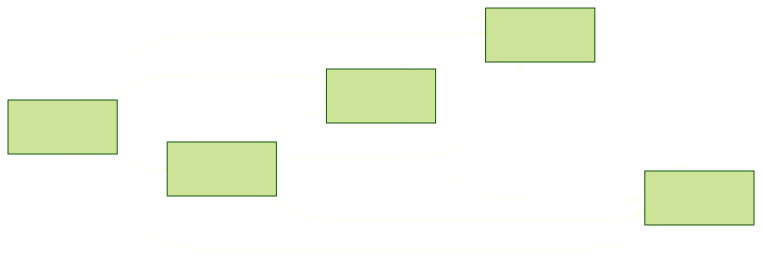

In [12]:
mermaid-ink($mmd-theme ~ "\n" ~ $g.mermaid, background => '1F1F1F', format => 'svg')

**Remark:** The graph is undirected and (it looks like) the service mermaid-ink shows the connections with arrows.

Much faster rendering if executed in a Jupyter notebook run in VS Code:

In [13]:
#%markdown
$g.mermaid():f

```mermaid
graph LR
node:3 --- node:4
node:4 --- node:5
node:1 --- node:4
node:2 --- node:4
node:1 --- node:3
node:2 --- node:3
node:3 --- node:5
node:2 --- node:5
node:1 --- node:5
node:1 --- node:2
```

In [14]:
#% html
$g.&sfdp(node-fixed-size=>True, node-shape => 'ellipse', node-width=>0.6, node-height=>0.3)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- node:1 -->
 
 node:1 
 
 node:1 
 
<!-- node:2 -->
 
 node:2 
 
 node:2 
 
<!-- node:1--node:2 -->
 
 node:1--node:2 
 
 
<!-- node:3 -->
 
 node:3 
 
 node:3 
 
<!-- node:1--node:3 -->
 
 node:1--node:3 
 
 
<!-- node:4 -->
 
 node:4 
 
 node:4 
 
<!-- node:1--node:4 -->
 
 node:1--node:4 
 
 
<!-- node:5 -->
 
 node:5 
 
 node:5 
 
<!-- node:1--node:5 -->
 
 node:1--node:5 
 
 
<!-- node:2--node:3 -->
 
 node:2--node:3 
 
 
<!-- node:2--node:4 -->
 
 node:2--node:4 
 
 
<!-- node:2--node:5 -->
 
 node:2--node:5 
 
 
<!-- node:3--node:4 -->
 
 node:3--node:4 
 
 
<!-- node:3--node:5 -->
 
 node:3--node:5 
 
 
<!-- node:4--node:5 -->
 
 node:4--node:5

------

## Complete K-ary tree

In [15]:
#%js
my $g = Graph::CompleteKaryTree.new(n => 4, k => 3, prefix => '', :directed);

$g.edges(:dataset) 
==> js-d3-graph-plot(
        :$background, 
        title-color => 'none',  
        width => 600, 
        :$edge-thickness,
        :$vertex-size,
        vertex-color => 'SlateBlue',
        directed => $g.directed,
        force => {charge => {strength => -120, iterations => 2}, collision => {radius => 4, iterations => 1}, link => {minDistance => 10}}
    )

In [16]:
#%markdown
$g.mermaid(direction=>'TD'):f

```mermaid
graph TD
9 --> 30
9 --> 29
9 --> 28
12 --> 37
12 --> 39
12 --> 38
8 --> 26
8 --> 27
8 --> 25
2 --> 8
2 --> 9
2 --> 7
5 --> 16
5 --> 17
5 --> 18
11 --> 36
11 --> 35
11 --> 34
1 --> 4
1 --> 6
1 --> 5
7 --> 22
7 --> 23
7 --> 24
4 --> 15
4 --> 14
4 --> 13
6 --> 20
6 --> 19
6 --> 21
0 --> 3
0 --> 2
0 --> 1
3 --> 12
3 --> 11
3 --> 10
10 --> 31
10 --> 33
10 --> 32
```

In [17]:
#% html
$g.&neato(background => '#1F1F1F', node-font-color=>'Ivory', node-label-location=>'c', node-size => 0.2, node-color => 'LightBlue', node-fill-color => 'SlateBlue')

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- 0 -->
 
 0 
 
 0 
 
<!-- 1 -->
 
 1 
 
 1 
 
<!-- 0->1 -->
 
 0->1 
 
 
 
<!-- 2 -->
 
 2 
 
 2 
 
<!-- 0->2 -->
 
 0->2 
 
 
 
<!-- 3 -->
 
 3 
 
 3 
 
<!-- 0->3 -->
 
 0->3 
 
 
 
<!-- 4 -->
 
 4 
 
 4 
 
<!-- 1->4 -->
 
 1->4 
 
 
 
<!-- 5 -->
 
 5 
 
 5 
 
<!-- 1->5 -->
 
 1->5 
 
 
 
<!-- 6 -->
 
 6 
 
 6 
 
<!-- 1->6 -->
 
 1->6 
 
 
 
<!-- 10 -->
 
 10 
 
 10 
 
<!-- 31 -->
 
 31 
 
 31 
 
<!-- 10->31 -->
 
 10->31 
 
 
 
<!-- 32 -->
 
 32 
 
 32 
 
<!-- 10->32 -->
 
 10->32 
 
 
 
<!-- 33 -->
 
 33 
 
 33 
 
<!-- 10->33 -->
 
 10->33 
 
 
 
<!-- 11 -->
 
 11 
 
 11 
 
<!-- 34 -->
 
 34 
 
 34 
 
<!-- 11->34 -->
 
 11->34 
 
 
 
<!-- 35 -->
 
 35 
 
 35 
 
<!-- 11->35 -->
 
 11->35 
 
 
 
<!-- 36 -->
 
 36 
 
 36 
 
<!-- 11->36 -->
 
 11->36 
 
 
 
<!-- 12 -->
 
 12 
 
 12 
 
<!-- 37 -->
 
 37 
 
 37 
 
<!-- 12->37 -->
 
 12->37 
 
 
 
<!-- 38 -->
 
 38 
 
 38 
 
<!-- 12->38 -->
 
 12->38 
 
 
 
<!-- 39 -->
 
 39 
 
 39 
 
<!-- 12->39 -->
 
 12->39 
 
 
 
<!-- 13 -->
 
 13 
 
 13 
 
<!-- 14 -->
 
 14 
 
 14 
 
<!-- 15 -->
 
 15 
 
 15 
 
<!-- 16 -->
 
 16 
 
 16 
 
<!-- 17 -->
 
 17 
 
 17 
 
<!-- 18 -->
 
 18 
 
 18 
 
<!-- 19 -->
 
 19 
 
 19 
 
<!-- 7 -->
 
 7 
 
 7 
 
<!-- 2->7 -->
 
 2->7 
 
 
 
<!-- 8 -->
 
 8 
 
 8 
 
<!-- 2->8 -->
 
 2->8 
 
 
 
<!-- 9 -->
 
 9 
 
 9 
 
<!-- 2->9 -->
 
 2->9 
 
 
 
<!-- 20 -->
 
 20 
 
 20 
 
<!-- 21 -->
 
 21 
 
 21 
 
<!-- 22 -->
 
 22 
 
 22 
 
<!-- 23 -->
 
 23 
 
 23 
 
<!-- 24 -->
 
 24 
 
 24 
 
<!-- 25 -->
 
 25 
 
 25 
 
<!-- 26 -->
 
 26 
 
 26 
 
<!-- 27 -->
 
 27 
 
 27 
 
<!-- 28 -->
 
 28 
 
 28 
 
<!-- 29 -->
 
 29 
 
 29 
 
<!-- 3->10 -->
 
 3->10 
 
 
 
<!-- 3->11 -->
 
 3->11 
 
 
 
<!-- 3->12 -->
 
 3->12 
 
 
 
<!-- 30 -->
 
 30 
 
 30 
 
<!-- 4->13 -->
 
 4->13 
 
 
 
<!-- 4->14 -->
 
 4->14 
 
 
 
<!-- 4->15 -->
 
 4->15 
 
 
 
<!-- 5->16 -->
 
 5->16 
 
 
 
<!-- 5->17 -->
 
 5->17 
 
 
 
<!-- 5->18 -->
 
 5->18 
 
 
 
<!-- 6->19 -->
 
 6->19 
 
 
 
<!-- 6->20 -->
 
 6->20 
 
 
 
<!-- 6->21 -->
 
 6->21 
 
 
 
<!-- 7->22 -->
 
 7->22 
 
 
 
<!-- 7->23 -->
 
 7->23 
 
 
 
<!-- 7->24 -->
 
 7->24 
 
 
 
<!-- 8->25 -->
 
 8->25 
 
 
 
<!-- 8->26 -->
 
 8->26 
 
 
 
<!-- 8->27 -->
 
 8->27 
 
 
 
<!-- 9->28 -->
 
 9->28 
 
 
 
<!-- 9->29 -->
 
 9->29 
 
 
 
<!-- 9->30 -->
 
 9->30

-----

## Cycle graph

In [18]:
#%js
my $g = Graph::Cycle.new(9, :directed);

$g.edges(:dataset) 
==> js-d3-graph-plot(
        :$background, 
        :$title-color, 
        width => 700, 
        :$edge-thickness,
        :$vertex-size, 
        directed => $g.directed,
        force => {charge => {strength => -1200, iterations => 2}, collision => {radius => 50, iterations => 1}, link => {minDistance => 30}}
    )

In [19]:
#%markdown
$g.mermaid():f

```mermaid
graph LR
4 --> 5
2 --> 3
3 --> 4
7 --> 8
0 --> 1
8 --> 0
5 --> 6
1 --> 2
6 --> 7
```

In [20]:
#% html
$g.&neato

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- 0 -->
 
 0 
 
 0 
 
<!-- 1 -->
 
 1 
 
 1 
 
<!-- 0->1 -->
 
 0->1 
 
 
 
<!-- 2 -->
 
 2 
 
 2 
 
<!-- 1->2 -->
 
 1->2 
 
 
 
<!-- 3 -->
 
 3 
 
 3 
 
<!-- 2->3 -->
 
 2->3 
 
 
 
<!-- 4 -->
 
 4 
 
 4 
 
<!-- 3->4 -->
 
 3->4 
 
 
 
<!-- 5 -->
 
 5 
 
 5 
 
<!-- 4->5 -->
 
 4->5 
 
 
 
<!-- 6 -->
 
 6 
 
 6 
 
<!-- 5->6 -->
 
 5->6 
 
 
 
<!-- 7 -->
 
 7 
 
 7 
 
<!-- 6->7 -->
 
 6->7 
 
 
 
<!-- 8 -->
 
 8 
 
 8 
 
<!-- 7->8 -->
 
 7->8 
 
 
 
<!-- 8->0 -->
 
 8->0

-----

## Grid graph

In [21]:
#%js
my $g = Graph::Grid.new(rows => 5, columns => 7):d;

$g.edges(:dataset) 
==> js-d3-graph-plot(
    vertex-coordinates => $g.vertex-coordinates,
    :$background, 
    :$title-color, 
    width => 600, 
    :$edge-thickness,
    :$vertex-size,
    force => {charge => {strength => -400, iterations => 2}, collision => {radius => 4, iterations => 1}, link => {distance => 0}}
):d

In [22]:
#% html
#$g.vertex-coordinates = {};
$g.&neato(node-width=>0.4, node-color=>'Gray', node-shape=>'square')

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- 3_4 -->
 
 3_4 
 
 3_4 
 
<!-- 3_5 -->
 
 3_5 
 
 3_5 
 
<!-- 3_4->3_5 -->
 
 3_4->3_5 
 
 
 
<!-- 4_4 -->
 
 4_4 
 
 4_4 
 
<!-- 3_4->4_4 -->
 
 3_4->4_4 
 
 
 
<!-- 3_3 -->
 
 3_3 
 
 3_3 
 
<!-- 3_3->3_4 -->
 
 3_3->3_4 
 
 
 
<!-- 4_3 -->
 
 4_3 
 
 4_3 
 
<!-- 3_3->4_3 -->
 
 3_3->4_3 
 
 
 
<!-- 3_0 -->
 
 3_0 
 
 3_0 
 
<!-- 3_1 -->
 
 3_1 
 
 3_1 
 
<!-- 3_0->3_1 -->
 
 3_0->3_1 
 
 
 
<!-- 4_0 -->
 
 4_0 
 
 4_0 
 
<!-- 3_0->4_0 -->
 
 3_0->4_0 
 
 
 
<!-- 0_0 -->
 
 0_0 
 
 0_0 
 
<!-- 0_1 -->
 
 0_1 
 
 0_1 
 
<!-- 0_0->0_1 -->
 
 0_0->0_1 
 
 
 
<!-- 1_0 -->
 
 1_0 
 
 1_0 
 
<!-- 0_0->1_0 -->
 
 0_0->1_0 
 
 
 
<!-- 4_6 -->
 
 4_6 
 
 4_6 
 
<!-- 4_3->4_4 -->
 
 4_3->4_4 
 
 
 
<!-- 0_2 -->
 
 0_2 
 
 0_2 
 
<!-- 0_3 -->
 
 0_3 
 
 0_3 
 
<!-- 0_2->0_3 -->
 
 0_2->0_3 
 
 
 
<!-- 1_2 -->
 
 1_2 
 
 1_2 
 
<!-- 0_2->1_2 -->
 
 0_2->1_2 
 
 
 
<!-- 1_1 -->
 
 1_1 
 
 1_1 
 
<!-- 1_1->1_2 -->
 
 1_1->1_2 
 
 
 
<!-- 2_1 -->
 
 2_1 
 
 2_1 
 
<!-- 1_1->2_1 -->
 
 1_1->2_1 
 
 
 
<!-- 4_1 -->
 
 4_1 
 
 4_1 
 
<!-- 3_1->4_1 -->
 
 3_1->4_1 
 
 
 
<!-- 3_2 -->
 
 3_2 
 
 3_2 
 
<!-- 3_1->3_2 -->
 
 3_1->3_2 
 
 
 
<!-- 2_3 -->
 
 2_3 
 
 2_3 
 
<!-- 2_3->3_3 -->
 
 2_3->3_3 
 
 
 
<!-- 2_4 -->
 
 2_4 
 
 2_4 
 
<!-- 2_3->2_4 -->
 
 2_3->2_4 
 
 
 
<!-- 4_2 -->
 
 4_2 
 
 4_2 
 
<!-- 4_1->4_2 -->
 
 4_1->4_2 
 
 
 
<!-- 1_3 -->
 
 1_3 
 
 1_3 
 
<!-- 0_3->1_3 -->
 
 0_3->1_3 
 
 
 
<!-- 0_4 -->
 
 0_4 
 
 0_4 
 
<!-- 0_3->0_4 -->
 
 0_3->0_4 
 
 
 
<!-- 3_6 -->
 
 3_6 
 
 3_6 
 
<!-- 3_5->3_6 -->
 
 3_5->3_6 
 
 
 
<!-- 4_5 -->
 
 4_5 
 
 4_5 
 
<!-- 3_5->4_5 -->
 
 3_5->4_5 
 
 
 
<!-- 0_1->0_2 -->
 
 0_1->0_2 
 
 
 
<!-- 0_1->1_1 -->
 
 0_1->1_1 
 
 
 
<!-- 4_2->4_3 -->
 
 4_2->4_3 
 
 
 
<!-- 1_6 -->
 
 1_6 
 
 1_6 
 
<!-- 2_6 -->
 
 2_6 
 
 2_6 
 
<!-- 1_6->2_6 -->
 
 1_6->2_6 
 
 
 
<!-- 4_4->4_5 -->
 
 4_4->4_5 
 
 
 
<!-- 2_5 -->
 
 2_5 
 
 2_5 
 
<!-- 2_5->3_5 -->
 
 2_5->3_5 
 
 
 
<!-- 2_5->2_6 -->
 
 2_5->2_6 
 
 
 
<!-- 2_6->3_6 -->
 
 2_6->3_6 
 
 
 
<!-- 2_0 -->
 
 2_0 
 
 2_0 
 
<!-- 2_0->3_0 -->
 
 2_0->3_0 
 
 
 
<!-- 2_0->2_1 -->
 
 2_0->2_1 
 
 
 
<!-- 1_4 -->
 
 1_4 
 
 1_4 
 
<!-- 1_4->2_4 -->
 
 1_4->2_4 
 
 
 
<!-- 1_5 -->
 
 1_5 
 
 1_5 
 
<!-- 1_4->1_5 -->
 
 1_4->1_5 
 
 
 
<!-- 1_3->2_3 -->
 
 1_3->2_3 
 
 
 
<!-- 1_3->1_4 -->
 
 1_3->1_4 
 
 
 
<!-- 1_2->1_3 -->
 
 1_2->1_3 
 
 
 
<!-- 2_2 -->
 
 2_2 
 
 2_2 
 
<!-- 1_2->2_2 -->
 
 1_2->2_2 
 
 
 
<!-- 0_5 -->
 
 0_5 
 
 0_5 
 
<!-- 0_5->1_5 -->
 
 0_5->1_5 
 
 
 
<!-- 0_6 -->
 
 0_6 
 
 0_6 
 
<!-- 0_5->0_6 -->
 
 0_5->0_6 
 
 
 
<!-- 2_4->3_4 -->
 
 2_4->3_4 
 
 
 
<!-- 2_4->2_5 -->
 
 2_4->2_5 
 
 
 
<!-- 0_4->1_4 -->
 
 0_4->1_4 
 
 
 
<!-- 0_4->0_5 -->
 
 0_4->0_5 
 
 
 
<!-- 1_0->1_1 -->
 
 1_0->1_1 
 
 
 
<!-- 1_0->2_0 -->
 
 1_0->2_0 
 
 
 
<!-- 1_5->1_6 -->
 
 1_5->1_6 
 
 
 
<!-- 1_5->2_5 -->
 
 1_5->2_5 
 
 
 
<!-- 0_6->1_6 -->
 
 0_6->1_6 
 
 
 
<!-- 3_6->4_6 -->
 
 3_6->4_6 
 
 
 
<!-- 4_0->4_1 -->
 
 4_0->4_1 
 
 
 
<!-- 3_2->3_3 -->
 
 3_2->3_3 
 
 
 
<!-- 3_2->4_2 -->
 
 3_2->4_2 
 
 
 
<!-- 2_1->3_1 -->
 
 2_1->3_1 
 
 
 
<!-- 2_1->2_2 -->
 
 2_1->2_2 
 
 
 
<!-- 4_5->4_6 -->
 
 4_5->4_6 
 
 
 
<!-- 2_2->2_3 -->
 
 2_2->2_3 
 
 
 
<!-- 2_2->3_2 -->
 
 2_2->3_2

-----

## Hexagonal grid

In [23]:
#%js
my $g = Graph::HexagonalGrid.new(3, 5, scale => 0.4);

$g.edges(:dataset) 
==> js-d3-graph-plot(
    vertex-coordinates => $g.vertex-coordinates,
    :$background, 
    :$title-color, 
    width => 800, 
    height => 400, 
    :$edge-thickness,
    :$vertex-size,
    directed => $g.directed,
)

In [24]:
$g

Graph(vertexes => 46, edges => 60, directed => False)

In [25]:
#% html
$g.dot(
    :$background,
    :node-labels,
    node-width => .3,
    node-height => .3,
    node-shape => 'hexagon',
    node-color => 'Ivory',
    node-penwidth => 1,
    node-fill-color => 'SlateBlue',
    node-font-size => 10,
    edge-thickness => 4,
    :$engine, 
    graph-size => (8,8)
):svg

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- 8 -->
 
 8 
 
 8 
 
<!-- 15 -->
 
 15 
 
 15 
 
<!-- 19 -->
 
 19 
 
 19 
 
<!-- 15--19 -->
 
 15--19 
 
 
<!-- 16 -->
 
 16 
 
 16 
 
<!-- 15--16 -->
 
 15--16 
 
 
<!-- 10 -->
 
 10 
 
 10 
 
<!-- 11 -->
 
 11 
 
 11 
 
<!-- 10--11 -->
 
 10--11 
 
 
<!-- 6 -->
 
 6 
 
 6 
 
<!-- 10--6 -->
 
 10--6 
 
 
<!-- 14 -->
 
 14 
 
 14 
 
<!-- 10--14 -->
 
 10--14 
 
 
<!-- 7 -->
 
 7 
 
 7 
 
<!-- 7--8 -->
 
 7--8 
 
 
<!-- 17 -->
 
 17 
 
 17 
 
<!-- 21 -->
 
 21 
 
 21 
 
<!-- 17--21 -->
 
 17--21 
 
 
<!-- 9 -->
 
 9 
 
 9 
 
<!-- 35 -->
 
 35 
 
 35 
 
<!-- 39 -->
 
 39 
 
 39 
 
<!-- 35--39 -->
 
 35--39 
 
 
<!-- 40 -->
 
 40 
 
 40 
 
<!-- 39--40 -->
 
 39--40 
 
 
<!-- 42 -->
 
 42 
 
 42 
 
<!-- 39--42 -->
 
 39--42 
 
 
<!-- 32 -->
 
 32 
 
 32 
 
<!-- 36 -->
 
 36 
 
 36 
 
<!-- 32--36 -->
 
 32--36 
 
 
<!-- 0 -->
 
 0 
 
 0 
 
<!-- 2 -->
 
 2 
 
 2 
 
<!-- 0--2 -->
 
 0--2 
 
 
<!-- 1 -->
 
 1 
 
 1 
 
<!-- 0--1 -->
 
 0--1 
 
 
<!-- 23 -->
 
 23 
 
 23 
 
<!-- 19--23 -->
 
 19--23 
 
 
<!-- 33 -->
 
 33 
 
 33 
 
<!-- 37 -->
 
 37 
 
 37 
 
<!-- 33--37 -->
 
 33--37 
 
 
<!-- 3 -->
 
 3 
 
 3 
 
<!-- 4 -->
 
 4 
 
 4 
 
<!-- 3--4 -->
 
 3--4 
 
 
<!-- 3--6 -->
 
 3--6 
 
 
<!-- 30 -->
 
 30 
 
 30 
 
<!-- 34 -->
 
 34 
 
 34 
 
<!-- 30--34 -->
 
 30--34 
 
 
<!-- 22 -->
 
 22 
 
 22 
 
<!-- 26 -->
 
 26 
 
 26 
 
<!-- 22--26 -->
 
 22--26 
 
 
<!-- 24 -->
 
 24 
 
 24 
 
<!-- 28 -->
 
 28 
 
 28 
 
<!-- 24--28 -->
 
 24--28 
 
 
<!-- 4--7 -->
 
 4--7 
 
 
<!-- 20 -->
 
 20 
 
 20 
 
<!-- 16--20 -->
 
 16--20 
 
 
<!-- 34--35 -->
 
 34--35 
 
 
<!-- 38 -->
 
 38 
 
 38 
 
<!-- 34--38 -->
 
 34--38 
 
 
<!-- 11--15 -->
 
 11--15 
 
 
<!-- 11--7 -->
 
 11--7 
 
 
<!-- 29 -->
 
 29 
 
 29 
 
<!-- 29--33 -->
 
 29--33 
 
 
<!-- 29--30 -->
 
 29--30 
 
 
<!-- 44 -->
 
 44 
 
 44 
 
<!-- 45 -->
 
 45 
 
 45 
 
<!-- 44--45 -->
 
 44--45 
 
 
<!-- 12 -->
 
 12 
 
 12 
 
<!-- 12--8 -->
 
 12--8 
 
 
<!-- 12--16 -->
 
 12--16 
 
 
<!-- 41 -->
 
 41 
 
 41 
 
<!-- 38--41 -->
 
 38--41 
 
 
<!-- 25 -->
 
 25 
 
 25 
 
<!-- 25--29 -->
 
 25--29 
 
 
<!-- 21--22 -->
 
 21--22 
 
 
<!-- 21--25 -->
 
 21--25 
 
 
<!-- 13 -->
 
 13 
 
 13 
 
<!-- 13--17 -->
 
 13--17 
 
 
<!-- 13--9 -->
 
 13--9 
 
 
<!-- 13--14 -->
 
 13--14 
 
 
<!-- 27 -->
 
 27 
 
 27 
 
<!-- 31 -->
 
 31 
 
 31 
 
<!-- 27--31 -->
 
 27--31 
 
 
<!-- 20--24 -->
 
 20--24 
 
 
<!-- 43 -->
 
 43 
 
 43 
 
<!-- 40--43 -->
 
 40--43 
 
 
<!-- 5 -->
 
 5 
 
 5 
 
<!-- 2--5 -->
 
 2--5 
 
 
<!-- 31--35 -->
 
 31--35 
 
 
<!-- 31--32 -->
 
 31--32 
 
 
<!-- 41--42 -->
 
 41--42 
 
 
<!-- 5--9 -->
 
 5--9 
 
 
<!-- 5--6 -->
 
 5--6 
 
 
<!-- 23--24 -->
 
 23--24 
 
 
<!-- 23--27 -->
 
 23--27 
 
 
<!-- 36--40 -->
 
 36--40 
 
 
<!-- 1--3 -->
 
 1--3 
 
 
<!-- 43--45 -->
 
 43--45 
 
 
<!-- 37--38 -->
 
 37--38 
 
 
<!-- 26--30 -->
 
 26--30 
 
 
<!-- 26--27 -->
 
 26--27 
 
 
<!-- 28--32 -->
 
 28--32 
 
 
<!-- 42--44 -->
 
 42--44 
 
 
<!-- 18 -->
 
 18 
 
 18 
 
<!-- 18--19 -->
 
 18--19 
 
 
<!-- 18--22 -->
 
 18--22 
 
 
<!-- 14--18 -->
 
 14--18

-----

## Hypercube

In [26]:
#%js
my $g = Graph::Hypercube.new(3);

$g.edges(:dataset) 
==> js-d3-graph-plot(
    :$background, 
    :$title-color, 
    width => 600, 
    :$edge-thickness,
    :$vertex-size,
    directed => $g.directed,
    force => {charge => {strength => -2000, iterations => 2}, collision => {radius => 60, iterations => 1}, link => {distance => 0}}
)

In [27]:
#% html
$g.&sfdp

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- 000 -->
 
 000 
 
 000 
 
<!-- 001 -->
 
 001 
 
 001 
 
<!-- 000--001 -->
 
 000--001 
 
 
<!-- 010 -->
 
 010 
 
 010 
 
<!-- 000--010 -->
 
 000--010 
 
 
<!-- 100 -->
 
 100 
 
 100 
 
<!-- 000--100 -->
 
 000--100 
 
 
<!-- 011 -->
 
 011 
 
 011 
 
<!-- 001--011 -->
 
 001--011 
 
 
<!-- 101 -->
 
 101 
 
 101 
 
<!-- 001--101 -->
 
 001--101 
 
 
<!-- 010--011 -->
 
 010--011 
 
 
<!-- 110 -->
 
 110 
 
 110 
 
<!-- 010--110 -->
 
 010--110 
 
 
<!-- 111 -->
 
 111 
 
 111 
 
<!-- 011--111 -->
 
 011--111 
 
 
<!-- 100--101 -->
 
 100--101 
 
 
<!-- 100--110 -->
 
 100--110 
 
 
<!-- 101--111 -->
 
 101--111 
 
 
<!-- 110--111 -->
 
 110--111

------

## Index(ed) graph

In [28]:
#% html
my $g = Graph::Grid.new(3,5);
Graph::Indexed.new($g,100).dot(:$background, engine => 'neato'):svg

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- 114 -->
 
 114 
 
 114 
 
<!-- 105 -->
 
 105 
 
 105 
 
<!-- 106 -->
 
 106 
 
 106 
 
<!-- 105--106 -->
 
 105--106 
 
 
<!-- 110 -->
 
 110 
 
 110 
 
<!-- 105--110 -->
 
 105--110 
 
 
<!-- 108 -->
 
 108 
 
 108 
 
<!-- 113 -->
 
 113 
 
 113 
 
<!-- 108--113 -->
 
 108--113 
 
 
<!-- 109 -->
 
 109 
 
 109 
 
<!-- 108--109 -->
 
 108--109 
 
 
<!-- 104 -->
 
 104 
 
 104 
 
<!-- 104--109 -->
 
 104--109 
 
 
<!-- 102 -->
 
 102 
 
 102 
 
<!-- 107 -->
 
 107 
 
 107 
 
<!-- 102--107 -->
 
 102--107 
 
 
<!-- 103 -->
 
 103 
 
 103 
 
<!-- 102--103 -->
 
 102--103 
 
 
<!-- 112 -->
 
 112 
 
 112 
 
<!-- 112--113 -->
 
 112--113 
 
 
<!-- 100 -->
 
 100 
 
 100 
 
<!-- 100--105 -->
 
 100--105 
 
 
<!-- 101 -->
 
 101 
 
 101 
 
<!-- 100--101 -->
 
 100--101 
 
 
<!-- 101--102 -->
 
 101--102 
 
 
<!-- 101--106 -->
 
 101--106 
 
 
<!-- 107--108 -->
 
 107--108 
 
 
<!-- 107--112 -->
 
 107--112 
 
 
<!-- 111 -->
 
 111 
 
 111 
 
<!-- 111--112 -->
 
 111--112 
 
 
<!-- 103--108 -->
 
 103--108 
 
 
<!-- 103--104 -->
 
 103--104 
 
 
<!-- 106--107 -->
 
 106--107 
 
 
<!-- 106--111 -->
 
 106--111 
 
 
<!-- 113--114 -->
 
 113--114 
 
 
<!-- 109--114 -->
 
 109--114 
 
 
<!-- 110--111 -->
 
 110--111

-----

## Knight tour

In [29]:
#%js
my $g = Graph::KnightTour.new(rows => 4, columns => 6, prefix => 'node:');

$g.edges(:dataset) 
==> js-d3-graph-plot(
        vertex-coordinates => $g.vertex-coordinates,
        :$background, 
        :$title-color, 
        width => 800, 
        :$edge-thickness, 
        :$vertex-size, 
        force => {x => {strength => .1}, y => {strength => .1}, charge => {strength => -300}, collision => {radius => 20}}
    )

In [30]:
#% html
$g.&neato

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- node:4_1 -->
 
 node:4_1 
 
 node:4_1 
 
<!-- node:5_3 -->
 
 node:5_3 
 
 node:5_3 
 
<!-- node:4_1--node:5_3 -->
 
 node:4_1--node:5_3 
 
 
<!-- node:3_1 -->
 
 node:3_1 
 
 node:3_1 
 
<!-- node:5_2 -->
 
 node:5_2 
 
 node:5_2 
 
<!-- node:3_1--node:5_2 -->
 
 node:3_1--node:5_2 
 
 
<!-- node:4_3 -->
 
 node:4_3 
 
 node:4_3 
 
<!-- node:3_1--node:4_3 -->
 
 node:3_1--node:4_3 
 
 
<!-- node:5_0 -->
 
 node:5_0 
 
 node:5_0 
 
<!-- node:3_1--node:5_0 -->
 
 node:3_1--node:5_0 
 
 
<!-- node:3_3 -->
 
 node:3_3 
 
 node:3_3 
 
<!-- node:3_3--node:4_1 -->
 
 node:3_3--node:4_1 
 
 
<!-- node:3_3--node:5_2 -->
 
 node:3_3--node:5_2 
 
 
<!-- node:0_2 -->
 
 node:0_2 
 
 node:0_2 
 
<!-- node:2_1 -->
 
 node:2_1 
 
 node:2_1 
 
<!-- node:0_2--node:2_1 -->
 
 node:0_2--node:2_1 
 
 
<!-- node:1_0 -->
 
 node:1_0 
 
 node:1_0 
 
<!-- node:0_2--node:1_0 -->
 
 node:0_2--node:1_0 
 
 
<!-- node:2_3 -->
 
 node:2_3 
 
 node:2_3 
 
<!-- node:0_2--node:2_3 -->
 
 node:0_2--node:2_3 
 
 
<!-- node:2_1--node:3_3 -->
 
 node:2_1--node:3_3 
 
 
<!-- node:4_2 -->
 
 node:4_2 
 
 node:4_2 
 
<!-- node:2_1--node:4_2 -->
 
 node:2_1--node:4_2 
 
 
<!-- node:4_0 -->
 
 node:4_0 
 
 node:4_0 
 
<!-- node:2_1--node:4_0 -->
 
 node:2_1--node:4_0 
 
 
<!-- node:1_0--node:3_1 -->
 
 node:1_0--node:3_1 
 
 
<!-- node:2_2 -->
 
 node:2_2 
 
 node:2_2 
 
<!-- node:1_0--node:2_2 -->
 
 node:1_0--node:2_2 
 
 
<!-- node:1_1 -->
 
 node:1_1 
 
 node:1_1 
 
<!-- node:3_2 -->
 
 node:3_2 
 
 node:3_2 
 
<!-- node:1_1--node:3_2 -->
 
 node:1_1--node:3_2 
 
 
<!-- node:3_0 -->
 
 node:3_0 
 
 node:3_0 
 
<!-- node:1_1--node:3_0 -->
 
 node:1_1--node:3_0 
 
 
<!-- node:1_1--node:2_3 -->
 
 node:1_1--node:2_3 
 
 
<!-- node:0_0 -->
 
 node:0_0 
 
 node:0_0 
 
<!-- node:0_0--node:2_1 -->
 
 node:0_0--node:2_1 
 
 
<!-- node:1_2 -->
 
 node:1_2 
 
 node:1_2 
 
<!-- node:0_0--node:1_2 -->
 
 node:0_0--node:1_2 
 
 
<!-- node:0_1 -->
 
 node:0_1 
 
 node:0_1 
 
<!-- node:2_0 -->
 
 node:2_0 
 
 node:2_0 
 
<!-- node:0_1--node:2_0 -->
 
 node:0_1--node:2_0 
 
 
<!-- node:0_1--node:2_2 -->
 
 node:0_1--node:2_2 
 
 
<!-- node:1_3 -->
 
 node:1_3 
 
 node:1_3 
 
<!-- node:0_1--node:1_3 -->
 
 node:0_1--node:1_3 
 
 
<!-- node:4_2--node:5_0 -->
 
 node:4_2--node:5_0 
 
 
<!-- node:0_3 -->
 
 node:0_3 
 
 node:0_3 
 
<!-- node:0_3--node:1_1 -->
 
 node:0_3--node:1_1 
 
 
<!-- node:0_3--node:2_2 -->
 
 node:0_3--node:2_2 
 
 
<!-- node:2_0--node:4_1 -->
 
 node:2_0--node:4_1 
 
 
<!-- node:2_0--node:3_2 -->
 
 node:2_0--node:3_2 
 
 
<!-- node:2_2--node:4_1 -->
 
 node:2_2--node:4_1 
 
 
<!-- node:2_2--node:4_3 -->
 
 node:2_2--node:4_3 
 
 
<!-- node:2_2--node:3_0 -->
 
 node:2_2--node:3_0 
 
 
<!-- node:5_1 -->
 
 node:5_1 
 
 node:5_1 
 
<!-- node:4_3--node:5_1 -->
 
 node:4_3--node:5_1 
 
 
<!-- node:1_3--node:2_1 -->
 
 node:1_3--node:2_1 
 
 
<!-- node:1_3--node:3_2 -->
 
 node:1_3--node:3_2 
 
 
<!-- node:3_2--node:5_3 -->
 
 node:3_2--node:5_3 
 
 
<!-- node:3_2--node:5_1 -->
 
 node:3_2--node:5_1 
 
 
<!-- node:3_2--node:4_0 -->
 
 node:3_2--node:4_0 
 
 
<!-- node:1_2--node:3_1 -->
 
 node:1_2--node:3_1 
 
 
<!-- node:1_2--node:3_3 -->
 
 node:1_2--node:3_3 
 
 
<!-- node:1_2--node:2_0 -->
 
 node:1_2--node:2_0 
 
 
<!-- node:4_0--node:5_2 -->
 
 node:4_0--node:5_2 
 
 
<!-- node:3_0--node:4_2 -->
 
 node:3_0--node:4_2 
 
 
<!-- node:3_0--node:5_1 -->
 
 node:3_0--node:5_1 
 
 
<!-- node:2_3--node:3_1 -->
 
 node:2_3--node:3_1 
 
 
<!-- node:2_3--node:4_2 -->
 
 node:2_3--node:4_2

-----

## Path graph

In [31]:
#%js
my $g = Graph::Path.new('a'..'h', prefix => '', :directed);

$g.edges(:dataset) 
==> js-d3-graph-plot(
        :$background, 
        :$title-color, 
        width => 500, 
        :$edge-thickness,
        :$vertex-size,
        directed => $g.directed,
        force => {charge => {strength => -600}, link => {minDistance => 40}}
    )

In [32]:
#% html
$g.&sfdp

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- a -->
 
 a 
 
 a 
 
<!-- b -->
 
 b 
 
 b 
 
<!-- a->b -->
 
 a->b 
 
 
 
<!-- c -->
 
 c 
 
 c 
 
<!-- b->c -->
 
 b->c 
 
 
 
<!-- d -->
 
 d 
 
 d 
 
<!-- c->d -->
 
 c->d 
 
 
 
<!-- e -->
 
 e 
 
 e 
 
<!-- d->e -->
 
 d->e 
 
 
 
<!-- f -->
 
 f 
 
 f 
 
<!-- e->f -->
 
 e->f 
 
 
 
<!-- g -->
 
 g 
 
 g 
 
<!-- f->g -->
 
 f->g 
 
 
 
<!-- h -->
 
 h 
 
 h 
 
<!-- g->h -->
 
 g->h

-----

## Petersen graph

In [33]:
#%js
my $g = Graph::Petersen.new(prefix => '');

$g.edges(:dataset) 
==> js-d3-graph-plot(
        vertex-coordinates => $g.vertex-coordinates,
        :$background, 
        :$title-color, 
        width => 300,
        height => 300, 
        :$edge-thickness,
        :$vertex-size,
        directed => $g.directed,
        force => {charge => {strength => -600}, link => {minDistance => 40}}
    )

In [34]:
#% html
$g.&neato

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- 5 -->
 
 5 
 
 5 
 
<!-- 6 -->
 
 6 
 
 6 
 
<!-- 5--6 -->
 
 5--6 
 
 
<!-- 9 -->
 
 9 
 
 9 
 
<!-- 5--9 -->
 
 5--9 
 
 
<!-- 1 -->
 
 1 
 
 1 
 
<!-- 3 -->
 
 3 
 
 3 
 
<!-- 1--3 -->
 
 1--3 
 
 
<!-- 1--6 -->
 
 1--6 
 
 
<!-- 4 -->
 
 4 
 
 4 
 
<!-- 1--4 -->
 
 1--4 
 
 
<!-- 0 -->
 
 0 
 
 0 
 
<!-- 0--5 -->
 
 0--5 
 
 
<!-- 0--3 -->
 
 0--3 
 
 
<!-- 2 -->
 
 2 
 
 2 
 
<!-- 0--2 -->
 
 0--2 
 
 
<!-- 8 -->
 
 8 
 
 8 
 
<!-- 3--8 -->
 
 3--8 
 
 
<!-- 7 -->
 
 7 
 
 7 
 
<!-- 2--7 -->
 
 2--7 
 
 
<!-- 2--4 -->
 
 2--4 
 
 
<!-- 6--7 -->
 
 6--7 
 
 
<!-- 7--8 -->
 
 7--8 
 
 
<!-- 8--9 -->
 
 8--9 
 
 
<!-- 4--9 -->
 
 4--9

### Properties

- Has radius 2 and diameter 2. It is the largest cubic graph with diameter 2.

In [35]:
say <radius diameter>.map({ $_ => $g."$_"() })

(radius => 2 diameter => 2)


- The Petersen graph has a Hamiltonian path but no Hamiltonian cycle. It is the smallest bridgeless cubic graph with no Hamiltonian cycle. It is hypohamiltonian, meaning that although it has no Hamiltonian cycle, deleting any vertex makes it Hamiltonian, and is the smallest hypohamiltonian graph.
(See [[Wk-Petersen](https://en.wikipedia.org/wiki/Petersen_graph)].)

In [36]:
$g.find-hamiltonian-path('0','6')

[0 5 9 8 3 1 4 2 7 6]

In [37]:
$g.find-hamiltonian-path('0', '6').rotor(2=>-1).map({$_.head => $_.tail })

(0 => 5 5 => 9 9 => 8 8 => 3 3 => 1 1 => 4 4 => 2 2 => 7 7 => 6)

In [38]:
#%js
$g.edges(:dataset) 
==> js-d3-graph-plot(
        vertex-coordinates => $g.vertex-coordinates,
        :$background, 
        :$title-color, 
        width => 300,
        height => 300, 
        :$edge-thickness,
        :$vertex-size,
        highlight => $g.find-hamiltonian-path('0', '6').rotor(2=>-1).map({$_.head => $_.tail }).List,
        force => {charge => {strength => -1400, iterations => 2}, collision => {radius => 1, iterations => 1}, link => {distance => 1}})

### Verify configuration

To display with Mathematica:

```raku
Graph::Petersen.new.wl;
```

```mathematica
aCoords = 
 Join[
  Table[ToString[i - 1] -> {Cos[i*2 Pi/5], -Sin[i*2 Pi/5]}, {i, 5}], 
  Table[ToString[i + 5 - 1] -> 2*{Cos[i*2 Pi/5], -Sin[i*2 Pi/5]}, {i, 5}]
]

gr = REPLACE
GraphPlot[gr, VertexLabels -> "Name", VertexCoordinates -> aCoords]
```

------

## Random graph

Create random graph with `600` vertexes and `500` edges:

In [39]:
my $tstart = now;

my $gl = Graph::Random.new(130, 232, :!directed);

my $tend = now;
say "Time to generate: {$tend - $tstart}";
say $gl;

Time to generate: 0.029840518
Graph(vertexes => 130, edges => 232, directed => False)


In [40]:
sink records-summary( $gl.vertex-list.map({ $gl.vertex-degree($_) }).List )

+--------------------+
| numerical          |
+--------------------+
| Min    => 0        |
| Mean   => 3.569231 |
| Median => 3        |
| 1st-Qu => 3        |
| Max    => 9        |
| 3rd-Qu => 5        |
+--------------------+


In [41]:
$gl.find-shortest-path('14', '30')

[14 15 76 124 78 30]

Visualize the random graph:

In [42]:
#%js
$gl.edges(:dataset) 
==> js-d3-graph-plot(
    :$background, 
    :$title-color, 
    width => 1200, 
    :$vertex-size, 
    :$edge-thickness, 
    force => {charge => {strength => -180, iterations => 2}, collision => {radius => 6, iterations => 10}, link => {distance => 4}}
)

### Vertex degree distribution

In [43]:
my %degrees = $gl.vertex-list.map({ $_ => $gl.vertex-degree($_) });

sink records-summary(%degrees.values.List)

+--------------------+
| numerical          |
+--------------------+
| Mean   => 3.569231 |
| Min    => 0        |
| 3rd-Qu => 5        |
| Median => 3        |
| 1st-Qu => 3        |
| Max    => 9        |
+--------------------+


In [44]:
#%js
js-d3-histogram(%degrees.values, :$background)

-----

## Random graphs by distribution specs

Here we use graph distribution specifications:

In [45]:
my @dists =
    |(Graph::Distribution::Uniform.new((10..40).pick, (20..100).pick) xx 2), 
    Graph::Distribution::BarabasiAlbert.new(30,2),
    Graph::Distribution::Bernoulli.new(16,0.6),
    Graph::Distribution::Bernoulli.new(20,0.3),
    Graph::Distribution::WattsStrogatz.new(20,0.07),
    Graph::Distribution::Price.new(20, 2, 1),
    Graph::Distribution::Spatial.new(20, 0.25);

[Graph::Distribution::Uniform.new(vertex-count => 35, edges-count => 61) Graph::Distribution::Uniform.new(vertex-count => 38, edges-count => 90) Graph::Distribution::BarabasiAlbert.new(vertex-count => 30, edges-count => 2) Graph::Distribution::Bernoulli.new(vertex-count => 16, p => 0.6) Graph::Distribution::Bernoulli.new(vertex-count => 20, p => 0.3) Graph::Distribution::WattsStrogatz.new(vertex-count => 20, p => 0.07) Graph::Distribution::Price.new(vertex-count => 20, edges-count => 2, attractiveness => 1) Graph::Distribution::Spatial.new(vertex-count => 20, radius => 0.25, dimension => 2)]

In [46]:
#% js
my %opts = :$title-color, :$background, force => {charge => {strength => -120}, link => {minDistance => 10}}, width => 600;
@dists
    .map({Graph::Random.new($_)})
    .map({ js-d3-graph-plot($_.edges(:dataset), |%opts, directed => $_.directed, title => $_.dist.gist) }).join("\n")

-----

## Star

In [47]:
#%js
my $g = Graph::Star.new(rays => 7, center => 'hub', prefix => 's:', :directed);

$g.edges(:dataset) 
==> js-d3-graph-plot(
        vertex-coordinates => $g.vertex-coordinates,
        :$background, 
        :$title-color, 
        width => 400, 
        height => 400, 
        :$edge-thickness,
        :$vertex-size,
        directed => $g.directed,
        force => {charge => {strength => -1800, iterations => 2}, collision => {radius => 10, iterations => 1}, link => {minDistance => 30}}
    )

In [48]:
#% html
$g.&neato

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- s:7 -->
 
 s:7 
 
 s:7 
 
<!-- s:1 -->
 
 s:1 
 
 s:1 
 
<!-- s:5 -->
 
 s:5 
 
 s:5 
 
<!-- s:2 -->
 
 s:2 
 
 s:2 
 
<!-- s:6 -->
 
 s:6 
 
 s:6 
 
<!-- s:4 -->
 
 s:4 
 
 s:4 
 
<!-- s:3 -->
 
 s:3 
 
 s:3 
 
<!-- hub -->
 
 hub 
 
 hub 
 
<!-- hub->s:7 -->
 
 hub->s:7 
 
 
 
<!-- hub->s:1 -->
 
 hub->s:1 
 
 
 
<!-- hub->s:5 -->
 
 hub->s:5 
 
 
 
<!-- hub->s:2 -->
 
 hub->s:2 
 
 
 
<!-- hub->s:6 -->
 
 hub->s:6 
 
 
 
<!-- hub->s:4 -->
 
 hub->s:4 
 
 
 
<!-- hub->s:3 -->
 
 hub->s:3

-----

## Triangular grid

In [53]:
#%js
my $g = Graph::TriangularGrid.new(3, 5, scale => 0.4);

$g.edges(:dataset) 
==> js-d3-graph-plot(
    vertex-coordinates => $g.vertex-coordinates,
    :$background, 
    :$title-color, 
    width => 800, 
    height => 400, 
    :$edge-thickness,
    :$vertex-size,
    directed => $g.directed,
)

In [54]:
$g

Graph(vertexes => 24, edges => 53, directed => False)

In [55]:
#% html
$g.dot(
    :$background,
    :node-labels,
    node-width => .3,
    node-height => .3,
    node-shape => 'hexagon',
    node-color => 'Ivory',
    node-penwidth => 1,
    node-fill-color => 'SlateBlue',
    node-font-size => 10,
    edge-thickness => 4,
    :$engine, 
    graph-size => (8,8)
):svg

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- 17 -->
 
 17 
 
 17 
 
<!-- 21 -->
 
 21 
 
 21 
 
<!-- 17--21 -->
 
 17--21 
 
 
<!-- 19 -->
 
 19 
 
 19 
 
<!-- 17--19 -->
 
 17--19 
 
 
<!-- 9 -->
 
 9 
 
 9 
 
<!-- 13 -->
 
 13 
 
 13 
 
<!-- 13--17 -->
 
 13--17 
 
 
<!-- 13--9 -->
 
 13--9 
 
 
<!-- 15 -->
 
 15 
 
 15 
 
<!-- 13--15 -->
 
 13--15 
 
 
<!-- 14 -->
 
 14 
 
 14 
 
<!-- 16 -->
 
 16 
 
 16 
 
<!-- 14--16 -->
 
 14--16 
 
 
<!-- 18 -->
 
 18 
 
 18 
 
<!-- 14--18 -->
 
 14--18 
 
 
<!-- 23 -->
 
 23 
 
 23 
 
<!-- 21--23 -->
 
 21--23 
 
 
<!-- 22 -->
 
 22 
 
 22 
 
<!-- 21--22 -->
 
 21--22 
 
 
<!-- 16--19 -->
 
 16--19 
 
 
<!-- 16--18 -->
 
 16--18 
 
 
<!-- 20 -->
 
 20 
 
 20 
 
<!-- 16--20 -->
 
 16--20 
 
 
<!-- 4 -->
 
 4 
 
 4 
 
<!-- 8 -->
 
 8 
 
 8 
 
<!-- 4--8 -->
 
 4--8 
 
 
<!-- 6 -->
 
 6 
 
 6 
 
<!-- 4--6 -->
 
 4--6 
 
 
<!-- 7 -->
 
 7 
 
 7 
 
<!-- 4--7 -->
 
 4--7 
 
 
<!-- 1 -->
 
 1 
 
 1 
 
<!-- 1--4 -->
 
 1--4 
 
 
<!-- 3 -->
 
 3 
 
 3 
 
<!-- 1--3 -->
 
 1--3 
 
 
<!-- 2 -->
 
 2 
 
 2 
 
<!-- 1--2 -->
 
 1--2 
 
 
<!-- 22--23 -->
 
 22--23 
 
 
<!-- 19--21 -->
 
 19--21 
 
 
<!-- 19--22 -->
 
 19--22 
 
 
<!-- 19--20 -->
 
 19--20 
 
 
<!-- 11 -->
 
 11 
 
 11 
 
<!-- 11--9 -->
 
 11--9 
 
 
<!-- 11--13 -->
 
 11--13 
 
 
<!-- 11--15 -->
 
 11--15 
 
 
<!-- 12 -->
 
 12 
 
 12 
 
<!-- 11--12 -->
 
 11--12 
 
 
<!-- 11--8 -->
 
 11--8 
 
 
<!-- 11--7 -->
 
 11--7 
 
 
<!-- 5 -->
 
 5 
 
 5 
 
<!-- 5--9 -->
 
 5--9 
 
 
<!-- 5--7 -->
 
 5--7 
 
 
<!-- 3--4 -->
 
 3--4 
 
 
<!-- 3--5 -->
 
 3--5 
 
 
<!-- 3--7 -->
 
 3--7 
 
 
<!-- 0 -->
 
 0 
 
 0 
 
<!-- 0--1 -->
 
 0--1 
 
 
<!-- 0--2 -->
 
 0--2 
 
 
<!-- 15--17 -->
 
 15--17 
 
 
<!-- 15--16 -->
 
 15--16 
 
 
<!-- 15--19 -->
 
 15--19 
 
 
<!-- 18--20 -->
 
 18--20 
 
 
<!-- 10 -->
 
 10 
 
 10 
 
<!-- 10--14 -->
 
 10--14 
 
 
<!-- 10--12 -->
 
 10--12 
 
 
<!-- 10--8 -->
 
 10--8 
 
 
<!-- 10--6 -->
 
 10--6 
 
 
<!-- 12--14 -->
 
 12--14 
 
 
<!-- 12--16 -->
 
 12--16 
 
 
<!-- 12--15 -->
 
 12--15 
 
 
<!-- 12--8 -->
 
 12--8 
 
 
<!-- 2--4 -->
 
 2--4 
 
 
<!-- 2--6 -->
 
 2--6 
 
 
<!-- 6--8 -->
 
 6--8 
 
 
<!-- 20--22 -->
 
 20--22 
 
 
<!-- 7--9 -->
 
 7--9 
 
 
<!-- 7--8 -->
 
 7--8

------
## Wheel graph

In [49]:
#%js
my $g = Graph::Wheel.new(spokes => 9, center => 'hub', prefix => 's:', :directed);

$g.edges(:dataset) 
==> js-d3-graph-plot(
        #vertex-coordinates => $g.vertex-coordinates,
        :$background, 
        :$title-color, 
        width => 400, 
        height => 400, 
        :$edge-thickness,
        :$vertex-size,
        directed => $g.directed,
        force => {charge => {strength => -1800, iterations => 2}, collision => {radius => 10, iterations => 1}, link => {minDistance => 3}}
    )

In [50]:
#% html
$g.&sfdp(node-label-location=>'c', node-width => 0.4, node-fill-color => 'SlateBlue')

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- s:4 -->
 
 s:4 
 
 s:4 
 
<!-- s:5 -->
 
 s:5 
 
 s:5 
 
<!-- s:4->s:5 -->
 
 s:4->s:5 
 
 
 
<!-- s:7 -->
 
 s:7 
 
 s:7 
 
<!-- s:8 -->
 
 s:8 
 
 s:8 
 
<!-- s:7->s:8 -->
 
 s:7->s:8 
 
 
 
<!-- hub -->
 
 hub 
 
 hub 
 
<!-- hub->s:4 -->
 
 hub->s:4 
 
 
 
<!-- hub->s:7 -->
 
 hub->s:7 
 
 
 
<!-- hub->s:5 -->
 
 hub->s:5 
 
 
 
<!-- s:1 -->
 
 s:1 
 
 s:1 
 
<!-- hub->s:1 -->
 
 hub->s:1 
 
 
 
<!-- hub->s:8 -->
 
 hub->s:8 
 
 
 
<!-- s:9 -->
 
 s:9 
 
 s:9 
 
<!-- hub->s:9 -->
 
 hub->s:9 
 
 
 
<!-- s:6 -->
 
 s:6 
 
 s:6 
 
<!-- hub->s:6 -->
 
 hub->s:6 
 
 
 
<!-- s:2 -->
 
 s:2 
 
 s:2 
 
<!-- hub->s:2 -->
 
 hub->s:2 
 
 
 
<!-- s:3 -->
 
 s:3 
 
 s:3 
 
<!-- hub->s:3 -->
 
 hub->s:3 
 
 
 
<!-- s:5->s:6 -->
 
 s:5->s:6 
 
 
 
<!-- s:1->s:2 -->
 
 s:1->s:2 
 
 
 
<!-- s:8->s:9 -->
 
 s:8->s:9 
 
 
 
<!-- s:9->s:1 -->
 
 s:9->s:1 
 
 
 
<!-- s:6->s:7 -->
 
 s:6->s:7 
 
 
 
<!-- s:2->s:3 -->
 
 s:2->s:3 
 
 
 
<!-- s:3->s:4 -->
 
 s:3->s:4

Wheel graphs are Hamiltonian:

In [51]:
my @path = $g.find-hamiltonian-path('hub', 's:1').push('hub')

[hub s:2 s:3 s:4 s:5 s:6 s:7 s:8 s:9 s:1 hub]

In [52]:
#%js
$g.edges(:dataset) 
==> js-d3-graph-plot(
        highlight => |@path.rotor(2 => -1).map({ $_.head => $_.tail }).Array,
        :$background, 
        :$title-color, 
        width => 300,
        height => 300, 
        :$edge-thickness,
        :$vertex-size,
        :!directed,
        force => {charge => {strength => -1400, iterations => 2}, collision => {radius => 1, iterations => 1}, link => {distance => 1}})

In [53]:
#% html
neato($g, highlight => |@path.rotor(2 => -1).map({ $_.head => $_.tail }).Array)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- s:4 -->
 
 s:4 
 
 s:4 
 
<!-- s:5 -->
 
 s:5 
 
 s:5 
 
<!-- s:4->s:5 -->
 
 s:4->s:5 
 
 
 
<!-- s:7 -->
 
 s:7 
 
 s:7 
 
<!-- s:8 -->
 
 s:8 
 
 s:8 
 
<!-- s:7->s:8 -->
 
 s:7->s:8 
 
 
 
<!-- hub -->
 
 hub 
 
 hub 
 
<!-- hub->s:4 -->
 
 hub->s:4 
 
 
 
<!-- hub->s:7 -->
 
 hub->s:7 
 
 
 
<!-- hub->s:5 -->
 
 hub->s:5 
 
 
 
<!-- hub->s:8 -->
 
 hub->s:8 
 
 
 
<!-- s:9 -->
 
 s:9 
 
 s:9 
 
<!-- hub->s:9 -->
 
 hub->s:9 
 
 
 
<!-- s:6 -->
 
 s:6 
 
 s:6 
 
<!-- hub->s:6 -->
 
 hub->s:6 
 
 
 
<!-- s:2 -->
 
 s:2 
 
 s:2 
 
<!-- hub->s:2 -->
 
 hub->s:2 
 
 
 
<!-- s:3 -->
 
 s:3 
 
 s:3 
 
<!-- hub->s:3 -->
 
 hub->s:3 
 
 
 
<!-- s:5->s:6 -->
 
 s:5->s:6 
 
 
 
<!-- s:1 -->
 
 s:1 
 
 s:1 
 
<!-- s:1->hub -->
 
 s:1->hub 
 
 
 
<!-- s:1->s:2 -->
 
 s:1->s:2 
 
 
 
<!-- s:8->s:9 -->
 
 s:8->s:9 
 
 
 
<!-- s:9->s:1 -->
 
 s:9->s:1 
 
 
 
<!-- s:6->s:7 -->
 
 s:6->s:7 
 
 
 
<!-- s:2->s:3 -->
 
 s:2->s:3 
 
 
 
<!-- s:3->s:4 -->
 
 s:3->s:4